In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import pickle
from scipy import optimize
import sklearn.metrics as metrics

In [2]:
res1_l_09 = pickle.load(open("result_09/light/res1.pickle", 'rb'))
res2_l_09 = pickle.load(open("result_09/light/res2.pickle", 'rb'))
res3_l_09 = pickle.load(open("result_09/light/res3.pickle", 'rb'))
res15_l_09 = pickle.load(open("result_09/light/res15.pickle", 'rb'))
res25_l_09 = pickle.load(open("result_09/light/res25.pickle", 'rb'))

res1_d_09 = pickle.load(open("result_09/dark/res1.pickle", 'rb'))
res2_d_09 = pickle.load(open("result_09/dark/res2.pickle", 'rb'))
res3_d_09 = pickle.load(open("result_09/dark/res3.pickle", 'rb'))
res15_d_09 = pickle.load(open("result_09/dark/res15.pickle", 'rb'))
res25_d_09 = pickle.load(open("result_09/dark/res25.pickle", 'rb'))

r_ur_ut_in_1_l_09 = pickle.load(open("result_09/light/r_ur_ut_in_1.pickle", 'rb'))
r_ur_ut_in_2_l_09 = pickle.load(open("result_09/light/r_ur_ut_in_2.pickle", 'rb'))
r_ur_ut_in_3_l_09 = pickle.load(open("result_09/light/r_ur_ut_in_3.pickle", 'rb'))
r_ur_ut_in_15_l_09 = pickle.load(open("result_09/light/r_ur_ut_in_15.pickle", 'rb'))
r_ur_ut_in_25_l_09 = pickle.load(open("result_09/light/r_ur_ut_in_25.pickle", 'rb'))

r_ur_ut_in_1_d_09 = pickle.load(open("result_09/dark/r_ur_ut_in_1.pickle", 'rb'))
r_ur_ut_in_2_d_09 = pickle.load(open("result_09/dark/r_ur_ut_in_2.pickle", 'rb'))
r_ur_ut_in_3_d_09 = pickle.load(open("result_09/dark/r_ur_ut_in_3.pickle", 'rb'))
r_ur_ut_in_15_d_09 = pickle.load(open("result_09/dark/r_ur_ut_in_15.pickle", 'rb'))
r_ur_ut_in_25_d_09 = pickle.load(open("result_09/dark/r_ur_ut_in_25.pickle", 'rb'))

r_ur_urErr_1_l_09 = pickle.load(open("result_09/light/r_ur_urErr_1.pickle", 'rb'))
r_ur_urErr_2_l_09 = pickle.load(open("result_09/light/r_ur_urErr_2.pickle", 'rb'))
r_ur_urErr_3_l_09 = pickle.load(open("result_09/light/r_ur_urErr_3.pickle", 'rb'))
r_ur_urErr_15_l_09 = pickle.load(open("result_09/light/r_ur_urErr_15.pickle", 'rb'))
r_ur_urErr_25_l_09 = pickle.load(open("result_09/light/r_ur_urErr_25.pickle", 'rb'))

r_ur_urErr_1_d_09 = pickle.load(open("result_09/dark/r_ur_urErr_1.pickle", 'rb'))
r_ur_urErr_2_d_09 = pickle.load(open("result_09/dark/r_ur_urErr_2.pickle", 'rb'))
r_ur_urErr_3_d_09 = pickle.load(open("result_09/dark/r_ur_urErr_3.pickle", 'rb'))
r_ur_urErr_15_d_09 = pickle.load(open("result_09/dark/r_ur_urErr_15.pickle", 'rb'))
r_ur_urErr_25_d_09 = pickle.load(open("result_09/dark/r_ur_urErr_25.pickle", 'rb'))

r_ut_utErr_1_l_09 = pickle.load(open("result_09/light/r_ut_utErr_1.pickle", 'rb'))
r_ut_utErr_2_l_09 = pickle.load(open("result_09/light/r_ut_utErr_2.pickle", 'rb'))
r_ut_utErr_3_l_09 = pickle.load(open("result_09/light/r_ut_utErr_3.pickle", 'rb'))
r_ut_utErr_15_l_09 = pickle.load(open("result_09/light/r_ut_utErr_15.pickle", 'rb'))
r_ut_utErr_25_l_09 = pickle.load(open("result_09/light/r_ut_utErr_25.pickle", 'rb'))

r_ut_utErr_1_d_09 = pickle.load(open("result_09/dark/r_ut_utErr_1.pickle", 'rb'))
r_ut_utErr_2_d_09 = pickle.load(open("result_09/dark/r_ut_utErr_2.pickle", 'rb'))
r_ut_utErr_3_d_09 = pickle.load(open("result_09/dark/r_ut_utErr_3.pickle", 'rb'))
r_ut_utErr_15_d_09 = pickle.load(open("result_09/dark/r_ut_utErr_15.pickle", 'rb'))
r_ut_utErr_25_d_09 = pickle.load(open("result_09/dark/r_ut_utErr_25.pickle", 'rb'))

In [3]:
r_ur_urErr_1_d_09[:, 0] = r_ur_urErr_1_d_09[:, 0]/10
r_ur_urErr_1_l_09[:, 0] = r_ur_urErr_1_l_09[:, 0]/10

In [4]:
r_ur_urErr_2_d_09[:, 0] = r_ur_urErr_2_d_09[:, 0]/10
r_ur_urErr_2_l_09[:, 0] = r_ur_urErr_2_l_09[:, 0]/10

In [5]:
r_ur_urErr_3_d_09[:, 0] = r_ur_urErr_3_d_09[:, 0]/10
r_ur_urErr_3_l_09[:, 0] = r_ur_urErr_3_l_09[:, 0]/10

In [6]:
r1 = r_ur_urErr_1_d_09[:, 0][::50][3:59]
ur1 = r_ur_urErr_1_d_09[:, 1][::50]
urr1 = r_ur_urErr_1_l_09[:, 1][::50]
u1 = np.append(ur1[3:20], urr1[20:59])

In [7]:
r2 = r_ur_urErr_2_d_09[:, 0][::50][3:59]
ur2 = r_ur_urErr_2_d_09[:, 1][::50]
urr2 = r_ur_urErr_2_l_09[:, 1][::50]
u2 = np.append(ur2[3:20], urr2[20:59])

In [8]:
r3 = r_ur_urErr_3_d_09[:, 0][::50][3:59]
ur3 = r_ur_urErr_3_d_09[:, 1][::50]
urr3 = r_ur_urErr_3_l_09[:, 1][::50]
u3 = np.append(ur3[3:20], urr3[20:59])

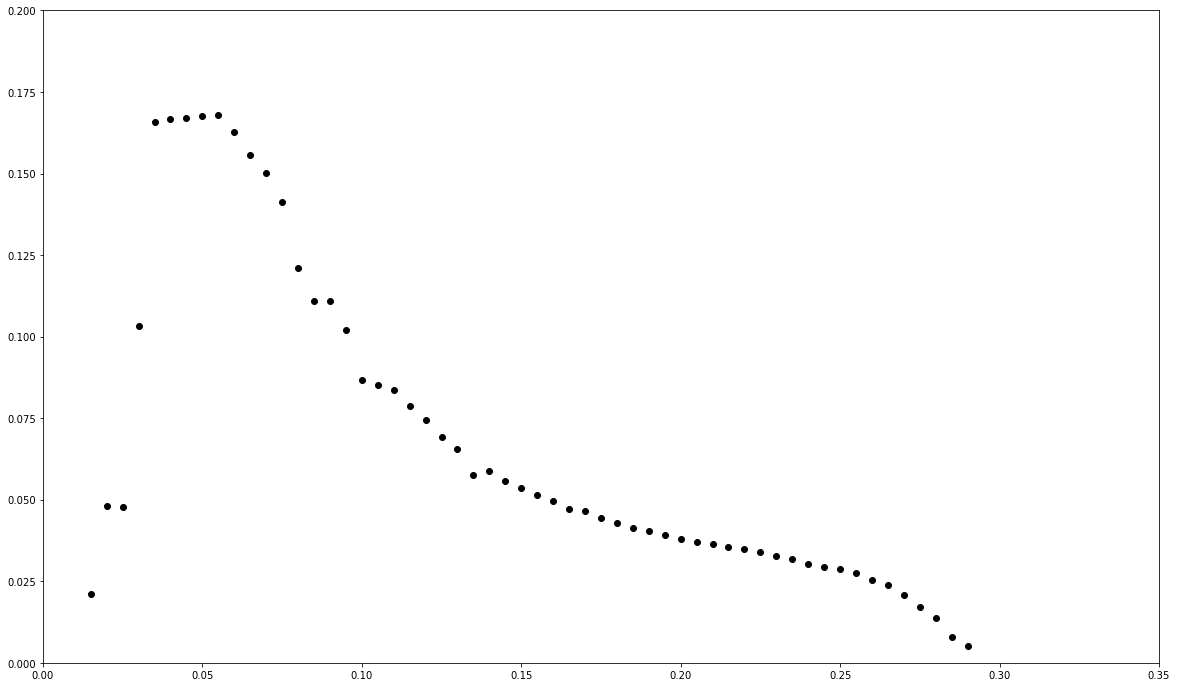

In [9]:
fig, ax = plt.subplots(figsize=(20, 12))

plt.xlim(0, 350/1e3)
plt.ylim(0, 200/1e3)

ax.scatter(r1/1e3, u1/1e3, color='k')

plt.show()

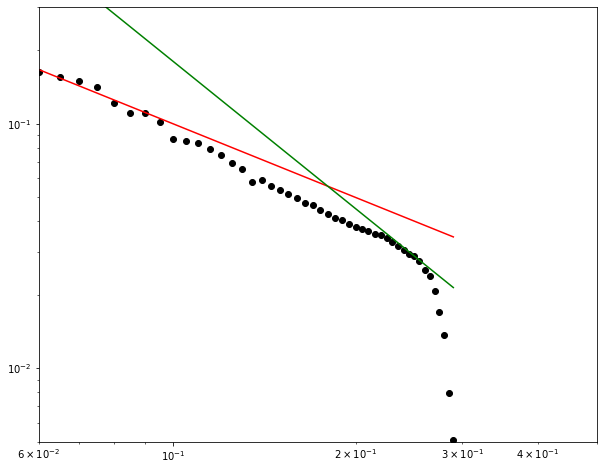

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.xlim(0.06, 0.5)
plt.ylim(0.005, 0.3)

ax.set_xscale("log")
ax.set_yscale("log")

ax.scatter(r1/1e3, u1/1e3, color='k')
ax.plot(r1/1e3, 0.01*(r1/1e3)**-1, c='r')
ax.plot(r1/1e3, 0.0018*(r1/1e3)**-2, c='g')

plt.show()

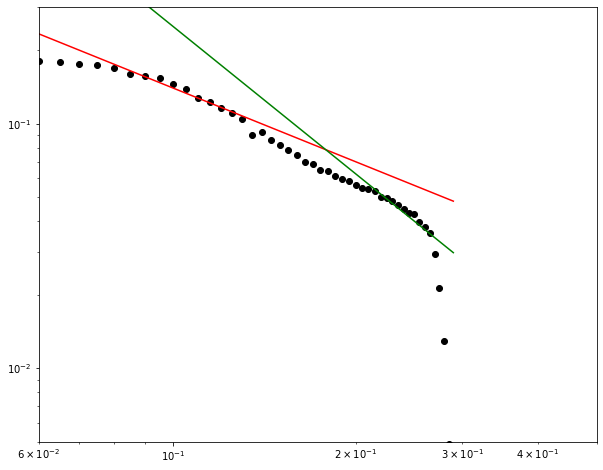

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.xlim(0.06, 0.5)
plt.ylim(0.005, 0.3)

ax.set_xscale("log")
ax.set_yscale("log")

ax.scatter(r2/1e3, u2/1e3, color='k')
ax.plot(r2/1e3, 0.014*(r2/1e3)**-1, c='r')
ax.plot(r2/1e3, 0.0025*(r2/1e3)**-2, c='g')

plt.show()

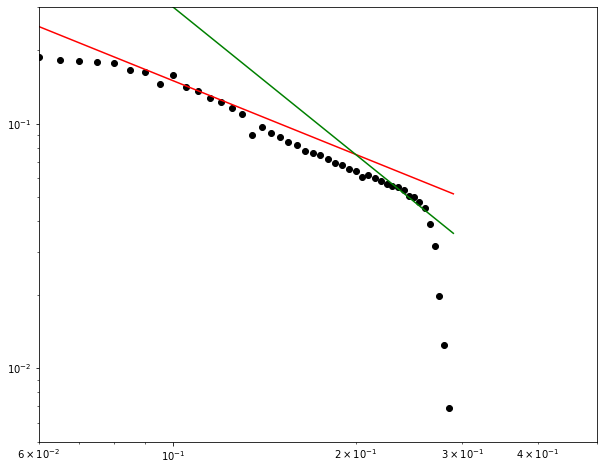

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.xlim(0.06, 0.5)
plt.ylim(0.005, 0.3)

ax.set_xscale("log")
ax.set_yscale("log")

ax.scatter(r3/1e3, u3/1e3, color='k')
ax.plot(r3/1e3, 0.015*(r3/1e3)**-1, c='r')
ax.plot(r3/1e3, 0.003*(r3/1e3)**-2, c='g')

plt.show()

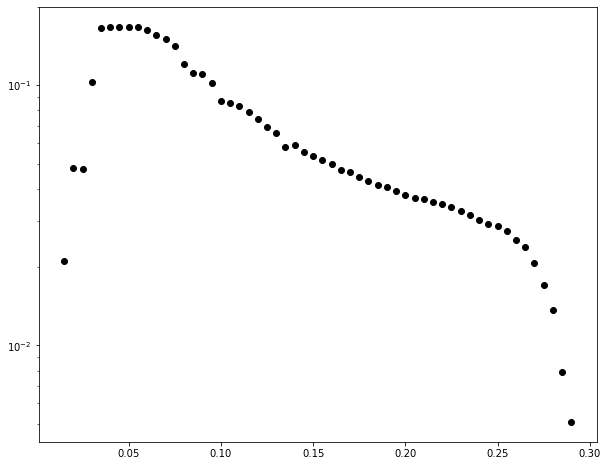

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.set_yscale("log")

ax.scatter(r1/1e3, u1/1e3, color='k')

plt.show()